In [1]:
import numpy as np


import leap_sim_utils.leapsim_utils as lhus
import time
import mujoco
import mujoco.viewer

import mujoco
import numpy as np
import matplotlib.pyplot as plt
import mujoco.viewer
import tempfile
import mediapy as media
import time
import os 
import sys
import matplotlib.pyplot as plt

from mujoco_main import LeapNodeMujoco

""

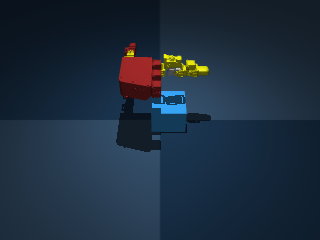

In [6]:

model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/index_thumb.xml'
leap_hand = LeapNodeMujoco(model_path)

m = mujoco.MjModel.from_xml_path(model_path)
d = mujoco.MjData(m)

with mujoco.Renderer(m) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())



LEAP Hand (index finger) and box

In [ ]:
duration = 5.0  # Duration in seconds
framerate = 30  # Frames per second

def main():
    #model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/leaphand.xml'
    model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/leaphand_demo.xml'
    leap_hand = LeapNodeMujoco(model_path)

    while leap_hand.d.time < duration:
        
        
        desired_pos=[1.5,0.1,1.5,1.5]
        leap_hand.apply_controls(desired_pos)
        


        
        leap_hand.step_simulation(duration,framerate)
        
    leap_hand.play_video(framerate)
        


if __name__ == "__main__":
    main()

LEAP Hand (index and thumb)

In [15]:
duration = 5.0  # Duration in seconds
framerate = 30  # Frames per second

def main():
    #model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/leaphand.xml'
    model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/index_thumb.xml'
    leap_hand = LeapNodeMujoco(model_path)

    # viewer=mujoco.viewer.launch(leap_hand.m, leap_hand.d)

    # while leap_hand.d.time < duration:
    while leap_hand.d.time < duration:

        # poses = [
        #     [1.5, 0, 1.5, 1.5, 0, 1.5, 1.5, 0],
        #     [0,0,0,0,0,0,0,0],
        #     [1.5, 0, 1.5, 1.5, 0, 1.5, 1.5, 0],
        #     ]

        # for i in range(len(poses)):
        #     leap_hand.set_leap(poses[i])
        #leap_hand.apply_controls(np.zeros(8))  
        leap_hand.apply_controls([np.pi/6, 0, 0, 0, 0, 0, 0, 0])          
        
        leap_hand.step_video(framerate)
            
        
    leap_hand.play_video(framerate)
        


if __name__ == "__main__":
    main()

Total frames captured: 151


In [ ]:
model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/index_thumb.xml'
leap_hand = LeapNodeMujoco(model_path)
# Accessing the position of the first camera
camera_position = leap_hand.d.cam_pos[0]
print("Camera Position:", camera_position)


In [ ]:
duration = 10.0  # Duration in seconds
framerate = 30  # Frames per second

def main():
    #model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/leaphand.xml'
    model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/index_thumb.xml'
    leap_hand = LeapNodeMujoco(model_path)

    # For PID control
    kP = 20  # Reduced from 600 to 100
    kI = 0
    kD = 100   # Reduced from 200 to 50
    curr_pos = 0
    prev_error = np.zeros_like(curr_pos)
    integral = np.zeros_like(curr_pos)

    desired_positions = 1.5

    # Simulate a gradual increase in control signals
    ramp_factor = 0.01  # A small factor to gradually increase control signals
    control_signals_prev=0

    print(f"Initial Position: {leap_hand.d.qpos[1]}")

    for step in range(int(duration * framerate)):
        current_positions = leap_hand.d.qpos[1]
        errors = desired_positions - current_positions
        integral = integral.astype(np.float64)  # Ensure integral is float64
        integral += errors
        derivative = errors - prev_error

        # Calculate control signals
        control_signals = (
            kP * errors +
            kI * integral +
            kD * derivative
        )

        # Smooth the transition by gradually updating the control signal
        control_signals = control_signals_prev + ramp_factor * (control_signals - control_signals_prev)
        control_signals = np.clip(control_signals, -leap_hand.curr_lim, leap_hand.curr_lim)

        # Apply control signals
        leap_hand.d.ctrl[1] = control_signals
        control_signals_prev = control_signals

        prev_error = errors

        # Step the simulation
        leap_hand.step_simulation(duration, framerate)

        # Debugging: Print control signal, position, and torque at each step
        print(f"Step {step + 1}:")
        print(f"Control Signal: {control_signals}")
        print(f"Position: {leap_hand.d.qpos[1]}")
        print(f"Torque: {leap_hand.d.qfrc_actuator[1]}")

    # Show the final position after the entire simulation
    print(f"Final Position: {leap_hand.d.qpos[1]}")

    # Play the captured video
    leap_hand.play_video(framerate)

if __name__ == "__main__":
    main()


In [ ]:
duration = 10.0  # Duration in seconds
framerate = 30  # Frames per second

def main():
    #model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/leaphand.xml'
    model_path = '/home/iitgn-robotics/Saniya/mujoco-3.1.6/model/leap hand/index_thumb.xml'
    leap_hand = LeapNodeMujoco(model_path)
    

    leap_hand.d.qpos[:]=0

    leap_hand.step_simulation(duration,framerate)


        

    # Play the captured video
    leap_hand.play_video(framerate)


if __name__ == "__main__":
    main()


In [ ]:
if __name__ == "__main__":
    main()
    